# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**


## Problem Statement

Research associated with the stock market focuses on offering the best tools to the investor to predict the behavior of their product portfolio in search of the best returns; but in a smaller number it addresses the dimensionality and expectations of the new investor.

The common perception of the new investor is that it is highly risky to place their savings in these investment models or that they are beyond their economic capacity.

Variations are instantaneous, but the returns from this type of investment do not occur in the short term. It is important to recognize the pattern of behavior in the medium or long term and to have 'nerves of steel' at the first signs of loss of value of their stock.

Understanding these variations and identifying similar patterns in the past are important, for an investor who wants to be properly advised. Understanding variations is part of informed decision making when investing in the stock market.

To solve this problem, the analysis of 'Time Series' is a tool that makes it easier to forecast the trend or even to forecast the future; this will provide the right investment tool in taking their decisions.

That is why we will experiment with predicting stock prices for a technology-based company using Machine Learning and Deep Learning Techniques. With which we will structure a set of prediction models to help the new investor in taking decisions about the acquisition or sale of its stocks.

The main objective is to show how to implement these algorithms, and to provide a final demonstration with one of the models; the one that provides the best final accuracy metrics and least possible error.

To maximize results and if you have little experience in time series, I suggest to start with the following articles:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)


### Clarify the project goal/scope.

- The `profit or loss calculation is usually determined by the 'Close Price'` of a stock for the day, hence we will **consider the closing price as the target variable**.

- Other data sets offer additional information such as: The attributes 'Dividend', 'Split' and 'Adjusted'. These attributes can then be used for a new research approach using the '**Granger Causality Test**' which is used to find out if one series can predict another series. This research will focus on the values provided by [MacroTrends](https://www.macrotrends.net/stocks/charts/INTC/intel/stock-price-history)

### Set down Evaluation Criteria
** pending **

El historico de datos considerados para esta investigacion preliminar comprenden desde Enero 01 del 2016 hasta la Enero 01 del 2021

### Set down preliminary research hypothesis
** pending **

utilizar registros hitoricos mayores a 10 puede agregar ruido al proceso de prediccion.


## Table of Contents
 1. Setup Work Environment
 2. Exploratory Data Analysis (EDA)
 3. Moving Average [Here](https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa)
 4. Finding the best model's parameters
 5. Predictions

3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)

###  1. Setup Work Environment

In [1]:
# Load libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

# plot within notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
## load parameters
# scaler = MinMaxScaler(feature_range=(0, 1))

# set figure size
rcParams['figure.figsize'] = 12, 7

In [3]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv') #,  index_col='Date', parse_dates=['Date'], date_parser=dateparse)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

In [4]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


### 2. Exploratory Data Analysis (EDA)

Workspace details [here](https://github.com/erojaso/Forecasting-Stock-Prices/blob/master/01_workspace_stock_price_forecast_eda.ipynb)

The dataset has daily operations at the stock market close, for a total of 10090 observations and 6 attributes.

You should consider that on **Saturdays**, **Sundays** and **Holidays** there are no stock market operations and therefore there are no data for these days.

There are multiple variables in the dataset [Reference](https://www.investopedia.com/):

- Columns '**Open**' and '**Close**' represent the starting and final price at which the stock is traded on a particular day.
- Columns '**High**' and '**Low**' represent the maximum and minimum price of the share for the day.
- Column '**Volume**' reprente number of shares bought or sold in the day.

### 2.1 General view

In [5]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)

Text(0, 0.5, 'USD')

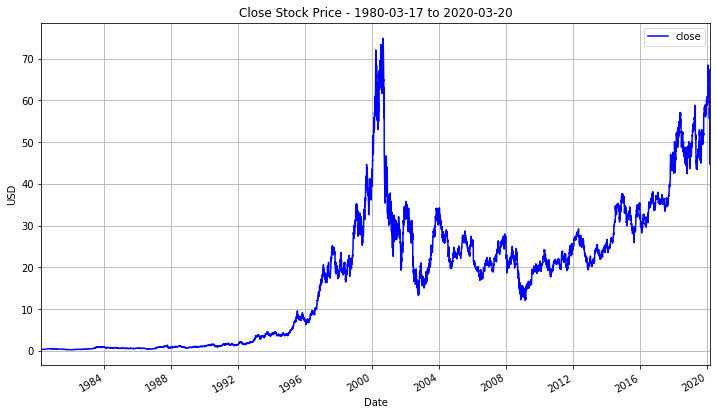

In [6]:
# plot close over time
rcParams['figure.figsize'] = 12, 7
ax = df.plot(y='close', style='b-', grid=True, title='Close Stock Price - 1980-03-17 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [7]:
df.describe()

,open,high,low,close,volume
count,10090.000000,10090.000000,10090.000000,10090.000000,1.009000e+04
mean,17.744796,17.988726,17.501696,17.743389,5.175399e+07
std,16.084734,16.313632,15.864770,16.085440,3.555889e+07
min,0.218800,0.218800,0.216100,0.216100,0.000000e+00
25%,1.130200,1.149350,1.117200,1.132800,2.760502e+07
50%,19.260000,19.500000,19.029950,19.250000,4.622693e+07
75%,27.306750,27.617500,26.909750,27.270000,6.631072e+07
max,75.630000,75.810000,73.630000,74.880000,5.677088e+08


The descriptive data view shows a relatively similar 'mean' and 'standard deviation' for the values 'open', ' high', 'low' and 'close'.

For the purposes of this preliminary investigation, the values for 'volume' have a bias that we will deal with right away, meanwhile we will remove this attribute from the data set.

The data set includes observations from 1984 until the present. Values older than 3 years will not be considered in this preliminary investigation. Part of this decision is based on the historical values shown from the origin 1980 until late of 2017. Therefore, observations with more than 3 years will be removed.

Such a detailed study will require time that is not contemplated within the scope of this investigation.

In [8]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)

In [9]:
# set start and end date range
start_date = dt.datetime(2018, 1, 31)
end_date = dt.datetime(2021, 1, 31)

# get data range by date
df_adj = df.loc[start_date:end_date, ]

In [10]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(538, 4)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2018-01-31 to 2020-03-20
Data columns (total 4 columns):
open     538 non-null float64
high     538 non-null float64
low      538 non-null float64
close    538 non-null float64
dtypes: float64(4)
memory usage: 21.0 KB
None

 First data rows:


,open,high,low,close
date,,,,
2018-01-31,49.230,49.25,47.5600,48.14
2018-02-01,47.695,48.47,47.4500,47.65
2018-02-02,47.320,47.79,46.1000,46.15
2018-02-05,46.350,47.26,44.5000,44.52
2018-02-06,44.020,44.93,43.0302,44.91


In [11]:
df_adj.describe()

,open,high,low,close
count,538.000000,538.000000,538.000000,538.000000
mean,51.373111,51.989972,50.795581,51.392565
std,5.179134,5.152480,5.196410,5.197871
min,43.350000,44.280000,42.040000,42.420000
25%,47.415000,47.996250,46.785000,47.382500
50%,50.510000,51.255000,50.000000,50.730000
75%,54.355000,54.737500,53.800000,54.355000
max,67.630000,69.290000,67.310000,68.470000


The adjustment of the proposed data returns 538 observacions and the 'mean' around 51+/-0.95 and 'standard deviation' of 5+/-0.01. Also the minimum and maximum value changed have been moved for the dependent variable 'Close Price' from: minimum (from 0.21 to 42.42) and maximum (from 74.88 to 68.47).

These could be preliminary clues to a stationary series, the data are clustered, and it is difficult to support this hypothesis.

Text(0, 0.5, 'USD')

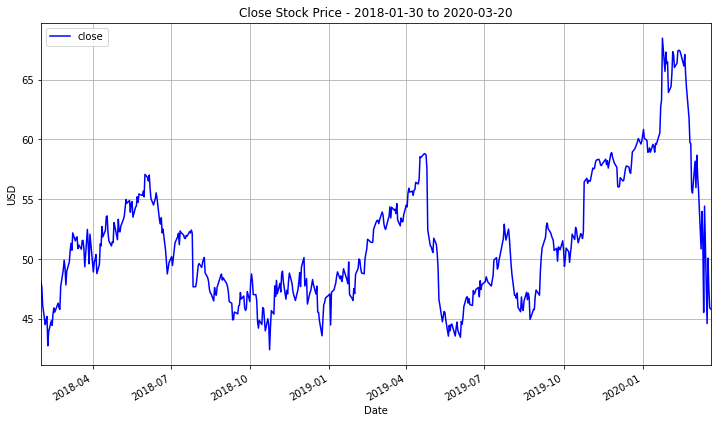

In [12]:
# plot close over time - after adjustments
rcParams['figure.figsize'] = 12, 7
ax = df_adj.plot(y='close', style='b-', grid=True, title='Close Stock Price - 2018-01-30 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

Therefore we need to ensure that our 'is not stationary' series. Under this scenary, we need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

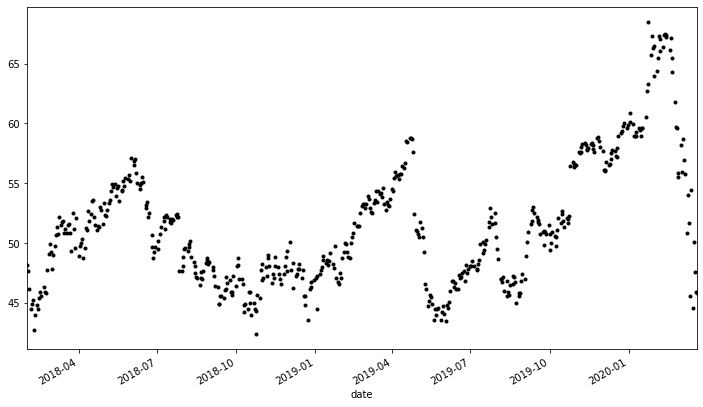

In [13]:
# plot the scatterplot:
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(style='k.')
plt.show()

We can also visualize the data in our series through a distribution too.

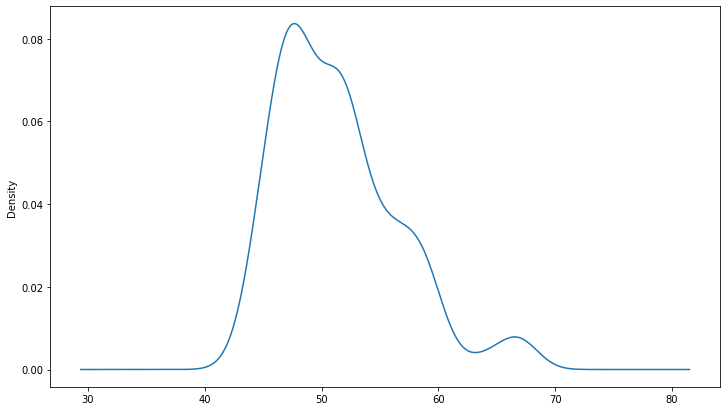

In [14]:
# Distribution of the dataset
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(kind='kde')

We can observe a distribution close to a normal distribution (bell curve) with a slight bias to its right on the closing values. This will possibly require us to adjust the values during data cleaning.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

### 2. Moving Average

In [15]:
# create empty dataset with dimension: range(start, finish): row=0 to len(df) 'all rows'
new_data = pd.DataFrame(index=range(0, len(df_adj)), columns=['Date', 'Close'])
new_data.head(5)

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [16]:
# copy values to new structure
for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]
    
new_data.head(5)

,Date,Close
0,2018-01-31 00:00:00,48.14
1,2018-02-01 00:00:00,47.65
2,2018-02-02 00:00:00,46.15
3,2018-02-05 00:00:00,44.52
4,2018-02-06 00:00:00,44.91


In [17]:
# splitting into train (0:430) and validation (430:**finish**) : 538 total
train = new_data[:430]
valid = new_data[430:]

# shapes of training set
print('\n Shape of trainning set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of trainning set:
(430, 2)

 Shape of validation set:
(108, 2)


In [18]:
# making predictions
preds = []
for i in range(0, valid.shape[0]):
    a = train['Close'][len(train)-108+i].sum() + sum(preds)
    b = a/108
    preds.append(b)

In [19]:
# checking the results (RMSE value)
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds), 2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

57.975839547938044


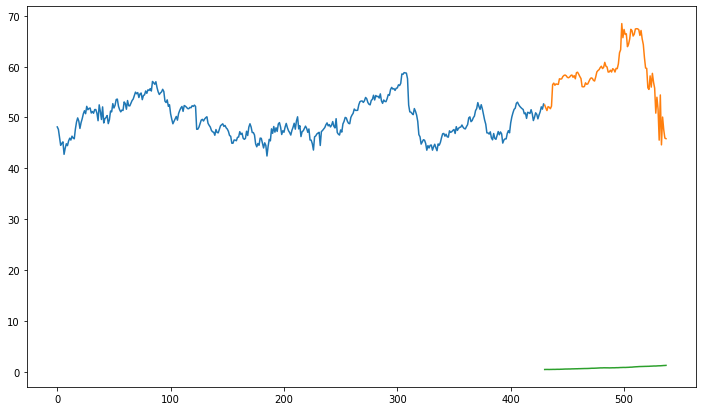

In [20]:
# copy predictions into valid data
valid['Predictions'] = 0
valid['Predictions'] = preds

# plot predict values
plt.plot(train['Close'])
#plt.plot(valid['Close'])
plt.plot(valid[['Close','Predictions']])

### 3. Linear Regression

In [21]:
# create empty dataset with dimension: range(start, finish): row=0 to len(df) 'all rows'
new_data = pd.DataFrame(index=range(0, len(df_adj)), columns=['Date', 'Close'])
new_data.head(5)

# copy values to new structure
for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]
    
new_data.info()
print('\n')    
new_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 2 columns):
Date     538 non-null object
Close    538 non-null object
dtypes: object(2)
memory usage: 8.5+ KB




,Date,Close
0,2018-01-31 00:00:00,48.14
1,2018-02-01 00:00:00,47.65
2,2018-02-02 00:00:00,46.15
3,2018-02-05 00:00:00,44.52
4,2018-02-06 00:00:00,44.91


In [22]:
# create features
#  conda install -c pytorch -c fastai fastai  
# from fastai.structured import add_datepart
from fastai.tabular import add_datepart

add_datepart(new_data, 'Date')

# remove atribute 'Elapsed', axis=1 means colummn
new_data.drop('Elapsed', axis=1, inplace=True)

new_data.head(5)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,48.14,2018,1,5,31,2,31,True,False,False,False,False,False
1,47.65,2018,2,5,1,3,32,False,True,False,False,False,False
2,46.15,2018,2,5,2,4,33,False,False,False,False,False,False
3,44.52,2018,2,6,5,0,36,False,False,False,False,False,False
4,44.91,2018,2,6,6,1,37,False,False,False,False,False,False


In [23]:
new_data['mon_fri'] = 0
for i in range(0, len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

new_data.head(10)        

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,48.14,2018,1,5,31,2,31,True,False,False,False,False,False,0
1,47.65,2018,2,5,1,3,32,False,True,False,False,False,False,0
2,46.15,2018,2,5,2,4,33,False,False,False,False,False,False,1
3,44.52,2018,2,6,5,0,36,False,False,False,False,False,False,1
4,44.91,2018,2,6,6,1,37,False,False,False,False,False,False,0
5,45.2,2018,2,6,7,2,38,False,False,False,False,False,False,0
6,42.75,2018,2,6,8,3,39,False,False,False,False,False,False,0
7,43.95,2018,2,6,9,4,40,False,False,False,False,False,False,1
8,44.83,2018,2,7,12,0,43,False,False,False,False,False,False,1
9,44.46,2018,2,7,13,1,44,False,False,False,False,False,False,0


In [24]:
# split into train and validation
train = new_data[:430]
valid = new_data[430:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# make predictions and find the rmse
preds = model.predict(x_valid)

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

11.676280429443725


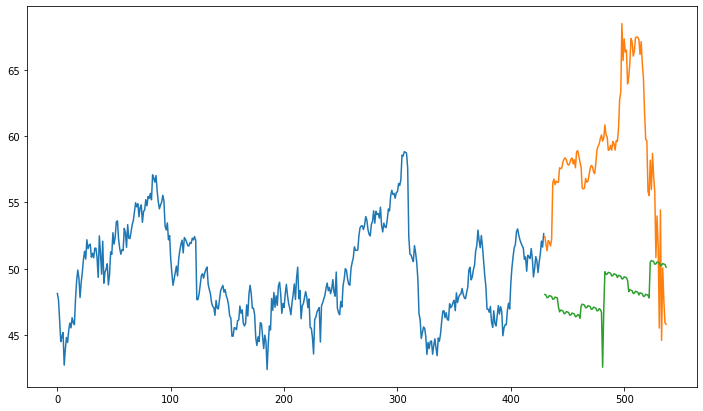

In [26]:
# add predictions to valid set
valid['Predictions'] = 0
valid['Predictions'] = preds

# add index value to train and valid set
valid.index = new_data[430:].index
train.index = new_data[:430].index

# plot
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### 4. k-Nearest Neighbours

In [27]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
x_train.head(5)

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,2018,1,5,31,2,31,True,False,False,False,False,False,0
1,2018,2,5,1,3,32,False,True,False,False,False,False,0
2,2018,2,5,2,4,33,False,False,False,False,False,False,1
3,2018,2,6,5,0,36,False,False,False,False,False,False,1
4,2018,2,6,6,1,37,False,False,False,False,False,False,0


In [29]:
x_valid.head(5)

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
430,2019,10,42,16,2,289,False,False,False,False,False,False,0
431,2019,10,42,17,3,290,False,False,False,False,False,False,0
432,2019,10,42,18,4,291,False,False,False,False,False,False,1
433,2019,10,43,21,0,294,False,False,False,False,False,False,1
434,2019,10,43,22,1,295,False,False,False,False,False,False,0


In [30]:
# Using the same train and validation set from the last section:
# scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [31]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.000000,0.078431,1.000000,0.50,0.079890,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.090909,0.078431,0.000000,0.75,0.082645,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.090909,0.078431,0.033333,1.00,0.085399,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.090909,0.098039,0.133333,0.00,0.093664,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.090909,0.098039,0.166667,0.25,0.096419,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
x_valid.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.818182,0.803922,0.500000,0.50,0.790634,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.818182,0.803922,0.533333,0.75,0.793388,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.818182,0.803922,0.566667,1.00,0.796143,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.818182,0.823529,0.666667,0.00,0.804408,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.818182,0.823529,0.700000,0.25,0.807163,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
#fit the model and make predictions
model.fit(x_train, y_train)
preds = model.predict(x_valid)

In [35]:
# results
# rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

10.736247908375226


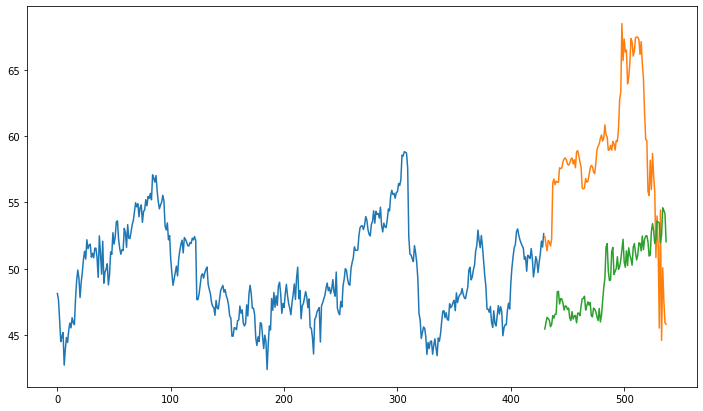

In [36]:
# copy pridictions to valid set
valid['Predictions'] = 0
valid['Predictions'] = preds

# plot
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
### Auto ARIMA

In [37]:
# create empty dataset with dimension: range(start, finish): row=0 to len(df) 'all rows'
new_data = pd.DataFrame(index=range(0, len(df_adj)), columns=['Date', 'Close'])
new_data.head(5)

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [38]:
# copy values to new structure
for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]
    
new_data.head(5)

,Date,Close
0,2018-01-31 00:00:00,48.14
1,2018-02-01 00:00:00,47.65
2,2018-02-02 00:00:00,46.15
3,2018-02-05 00:00:00,44.52
4,2018-02-06 00:00:00,44.91


In [39]:
# splitting into train (0:430) and validation (430:**finish**) : 538 total
train = new_data[:430]
valid = new_data[430:]

# shapes of training set
print('\n Shape of trainning set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of trainning set:
(430, 2)

 Shape of validation set:
(108, 2)


In [40]:
# conda install -c alkaline-ml pmdarima 
# restar computer after install
from pmdarima.arima import auto_arima

training = train['Close']
validation = valid['Close']

model = auto_arima(training, 
                   start_p=1, 
                   start_q=1,
                   max_p=3, 
                   max_q=3, 
                   m=12,
                   start_P=0, 
                   seasonal=True,
                   d=1, 
                   D=1, 
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=108)
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1199.105, BIC=1219.270, Time=1.168 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1446.036, BIC=1454.103, Time=0.040 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=1331.534, BIC=1347.666, Time=0.406 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1197.338, BIC=1213.470, Time=0.784 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=1444.062, BIC=1448.095, Time=0.038 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=1446.193, BIC=1462.325, Time=0.258 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=1200.928, BIC=1225.127, Time=1.665 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse r

In [41]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

6.577121967184061


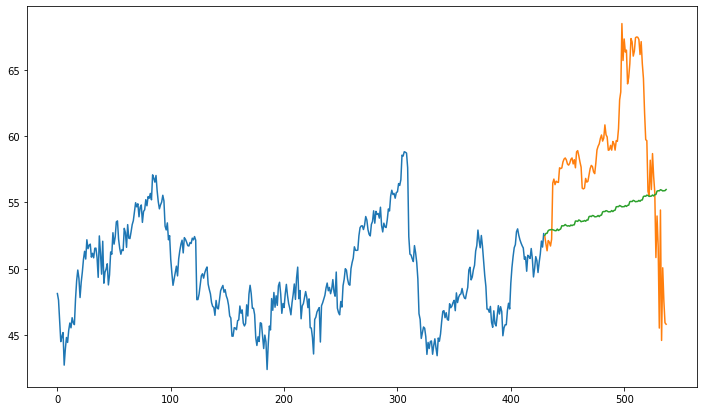

In [42]:
# plot
plt.plot(train['Close'])
plt.plot(valid['Close'])

# plot
plt.plot(forecast['Prediction'])

### Prophet

In [43]:
#importing prophet
from fbprophet import Prophet

In [44]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df_adj)), columns=['Date', 'Close'])

for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

# preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

# train and validation
train = new_data[:430]
valid = new_data[430:]

# fit the model
model = Prophet(yearly_seasonality=True)
model.fit(train)

# predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [165]:
#rmse
forecast_valid = forecast['yhat'][430:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

6.519771171084463


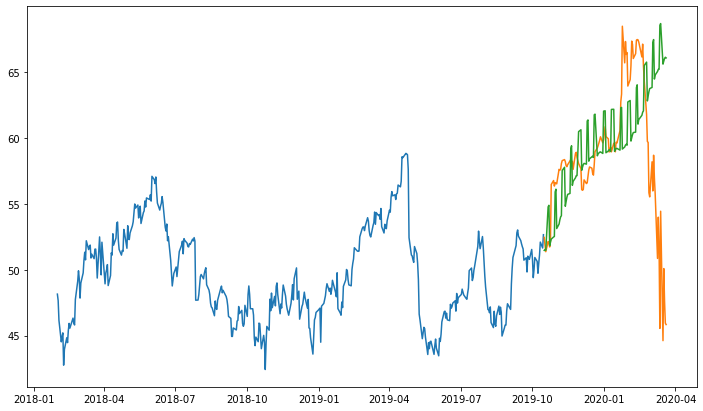

In [166]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

### Long Short Term Memory (LSTM)

In [187]:
# conda install -c anaconda tensorflow 
# importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df_adj)), columns=['Date', 'Close'])

for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]

# setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)    
    
train = new_data[:430]
valid = new_data[430:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_data)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 18s - loss: 0.0067


In [188]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

Close    4.080741
dtype: float64


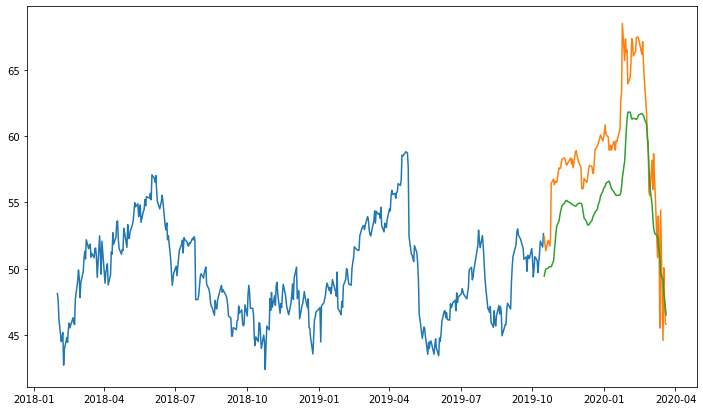

In [189]:
#for plotting
train = new_data[:430]
valid = new_data[430:]

valid['Predictions'] = closing_price

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])